# Exploring precision and recall using Logistic regression model on Amazon baby products reviews

### Fire up graphlab create

In [1]:
import graphlab
from __future__ import division
import numpy as np
graphlab.canvas.set_target('ipynb')

### Load amazon review dataset

In [2]:
products = graphlab.SFrame('amazon_baby.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to agrawal.pr@husky.neu.edu and will expire on March 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\agraw\AppData\Local\Temp\graphlab_server_1506717841.log.0


In [7]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3L, 'love': 1L,'it': 3L, 'highly': 1L, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3L, 'ingenious':1L, 'love': 2L, 'is': ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2L, 'all': 2L,'help': 1L, 'cried': 1L, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2L, 'cute': 1L,'help': 2L, 'habit': 1L, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1L, 'be': 1L,'is': 1L, 'bound': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2L, 'all': 1L,'right': 1L, 'able': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1L, 'fantastic':1L, 'help': 1L, 'give': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'all': 1L, 'standarad':1L, 'another': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 2L, 'nannys': 1L,'just': 1L, 'sleep': 2L, ...",1


## Extract word counts and sentiments

We compute the word counts for individual words and extract positive and negative sentiments from ratings. To summarize, we perform the following:

1. Remove punctuation.
2. Remove reviews with "neutral" sentiment (rating 3).
3. Set reviews with rating 4 or more to be positive and those with 2 or less to be negative.

In [5]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

# Remove punctuation.
review_clean = products['review'].apply(remove_punctuation)

# Count words
products['word_count'] = graphlab.text_analytics.count_words(review_clean)

# Drop neutral sentiment reviews.
products = products[products['rating'] != 3]

# Positive sentiment to +1 and negative sentiment to -1
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

Let's see what the dataset looks like by taking a quick peek:

In [6]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3L, 'love': 1L,'it': 3L, 'highly': 1L, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3L, 'ingenious':1L, 'love': 2L, 'is': ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2L, 'all': 2L,'help': 1L, 'cried': 1L, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2L, 'cute': 1L,'help': 2L, 'habit': 1L, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1L, 'be': 1L,'is': 1L, 'bound': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2L, 'all': 1L,'right': 1L, 'able': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1L, 'fantastic':1L, 'help': 1L, 'give': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'all': 1L, 'standarad':1L, 'another': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 2L, 'nannys': 1L,'just': 1L, 'sleep': 2L, ...",1


## Split data into training and test sets

We split the data into a 80-20 split where 80% is in the training set and 20% is in the test set.

In [8]:
train_data, test_data = products.random_split(.8, seed=1)

## Train a logistic regression classifier

We will now train a logistic regression classifier with **sentiment** as the target and **word_count** as the features.

Even though we now know how to implement logistic regression, we will use GraphLab Create for its efficiency at processing this Amazon dataset in its entirety.

In [9]:
model = graphlab.logistic_classifier.create(train_data, target='sentiment', features=['word_count'], validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133416

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 121712

Number of coefficients    : 121713

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 1         | 5        | 0.000002  | 2.363285     | 0.840754          |

| 2         | 9        | 3.000000  | 3.627650     | 0.931350          |

| 3         | 10       | 3.000000  | 4.069826     | 0.882046          |

| 4         | 11       | 3.000000  | 4.494959     | 0.954076          |

| 5         | 12       | 3.000000  | 4.939139     | 0.960964          |

| 6         | 13       | 3.000000  | 5.370285     | 0.975033          |

+-----------+----------+-----------+--------------+-------------------+

TERMINATED: Terminated due to numerical difficulties.

This model may not be ideal. To improve it, consider doing one of the following:
(a) Increasing the regularization.
(b) Standardizing the input data.
(c) Removing highly correlated features.
(d) Removing `inf` and `NaN` values in the training data.

## Model Evaluation

## Accuracy

Accuracy is given by

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified data points}}{\mbox{# total data points}}
$$

In [10]:
accuracy= model.evaluate(test_data, metric='accuracy')['accuracy']
print "Test Accuracy: %s" % accuracy

Test Accuracy: 0.914536837053


## Baseline: Majority class prediction

The majority classifier model predicts the majority class for all data points. 

Typically, a good model should beat the majority class classifier. Since the majority class in this dataset is the positive class (i.e., there are more positive than negative reviews), the accuracy of the majority class classifier can be computed as follows:

In [11]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print "Baseline accuracy (majority class classifier): %s" % baseline

Baseline accuracy (majority class classifier): 0.842782577394


**Looking at this we can say that the accuracy of our logistic regression model was better than the accuracy of the majority classifier model.**

## Confusion Matrix

The accuracy, while convenient, does not tell the whole story. In the case of binary classification, the confusion matrix is a 2-by-2 matrix laying out correct and incorrect predictions made in each label as follows:
```
              +---------------------------------------------+
              |                Predicted label              |
              +----------------------+----------------------+
              |          (+1)        |         (-1)         |
+-------+-----+----------------------+----------------------+
| True  |(+1) | # of true positives  | # of false negatives |
| label +-----+----------------------+----------------------+
|       |(-1) | # of false positives | # of true negatives  |
+-------+-----+----------------------+----------------------+
```

In [12]:
confusion_matrix = model.evaluate(test_data, metric='confusion_matrix')['confusion_matrix']
confusion_matrix

target_label,predicted_label,count
-1,-1,3798
-1,1,1443
1,-1,1406
1,1,26689


## Computing the cost of mistakes

As we can see in the above confusion matrix we have 1443 false positives. These are reviews are actually negative but our model predicted them to positive. Any one for example a manufacturer that sells a baby product on Amazon.com wouldn't want to display these reviews which are false positives otherwise they might gain some negative publicity and loss of revenue.

In other words, **false positives costs one dearly even more than false negatives**.

Suppose you know the costs involved in each kind of mistake: 
1. \$100 for each false positive.
2. \$1 for each false negative.
3. Correctly classified reviews incur no cost.

The cost of our logistic regression model would be (1443 x 100) + (1 x 1406) = $145,706

## Precision and Recall

One may not have exact dollar amounts for each kind of mistake. Instead, you may simply prefer to reduce the percentage of false positives to be less than, say, 3.5% of all positive predictions. This is where **precision** comes in:

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

So to keep the percentage of false positives below 3.5% of positive predictions, we must raise the precision to 96.5% or higher. 

**First**, let us compute the precision of the logistic regression classifier on the **test_data**.

In [13]:
precision = model.evaluate(test_data, metric='precision')['precision']
print "Precision on test data: %s" % precision

Precision on test data: 0.948706099815


So out of all reviews in the **test set** that are predicted to be positive by our model there are almost 5% of those reviews that are false positives meaning they are actually negative reviews.

A complementary metric is **recall**, which measures the ratio between the number of true positives and that of (ground-truth) positive reviews:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

Let us compute the recall on the **test_data**.

In [14]:
recall = model.evaluate(test_data, metric='recall')['recall']
print "Recall on test data: %s" % recall

Recall on test data: 0.949955508098


This means almost 95% of the positive reviews in the dataset were predicted correctly.

## Precision-recall tradeoff

We first examine what happens when we use a different threshold value for making class predictions.  We then explore a range of threshold values and plot the associated precision-recall curve.  

## Varying the threshold

False positives are costly in our example, so we may want to be more conservative about making positive predictions. To achieve this, instead of thresholding class probabilities at 0.5, we can choose a higher threshold. 

Following is a function called `apply_threshold` that accepts two things
* `probabilities` (an SArray of probability values)
* `threshold` (a float between 0 and 1).

The function returns an SArray, where each element is set to +1 or -1 depending whether the corresponding probability exceeds `threshold`.

In [15]:
def apply_threshold(probabilities, threshold):
    ### YOUR CODE GOES HERE
    # +1 if >= threshold and -1 otherwise.
    ans = graphlab.SArray([+1 if x >= threshold else -1 for x in probabilities])
    return ans

In [16]:
probabilities = model.predict(test_data, output_type='probability')
predictions_with_default_threshold = apply_threshold(probabilities, 0.5)
predictions_with_high_threshold = apply_threshold(probabilities, 0.9)

In [17]:
print "Number of positive predicted reviews (threshold = 0.5): %s" % (predictions_with_default_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.5): 28132


In [18]:
print "Number of positive predicted reviews (threshold = 0.9): %s" % (predictions_with_high_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.9): 25630


Hence it is clear as we increase the minimum threshold for a review to be positive, the number of reviews that are predicted positive comes down.

## Exploring the associated precision and recall as the threshold varies

By changing the probability threshold, it is possible to influence precision and recall. We can explore this as follows:

In [19]:
# Threshold = 0.5
precision_with_default_threshold = graphlab.evaluation.precision(test_data['sentiment'],
                                        predictions_with_default_threshold)

recall_with_default_threshold = graphlab.evaluation.recall(test_data['sentiment'],
                                        predictions_with_default_threshold)

# Threshold = 0.9
precision_with_high_threshold = graphlab.evaluation.precision(test_data['sentiment'],
                                        predictions_with_high_threshold)
recall_with_high_threshold = graphlab.evaluation.recall(test_data['sentiment'],
                                        predictions_with_high_threshold)

In [20]:
print "Precision (threshold = 0.5): %s" % precision_with_default_threshold
print "Recall (threshold = 0.5)   : %s" % recall_with_default_threshold

Precision (threshold = 0.5): 0.948706099815
Recall (threshold = 0.5)   : 0.949955508098


In [21]:
print "Precision (threshold = 0.9): %s" % precision_with_high_threshold
print "Recall (threshold = 0.9)   : %s" % recall_with_high_threshold

Precision (threshold = 0.9): 0.969527896996
Recall (threshold = 0.9)   : 0.884463427656


So with higher threshold our precision increases and recall decreases substantially. 

## Precision-recall curve

Now, we will explore various different values of tresholds, compute the precision and recall scores, and then plot the precision-recall curve.

In [22]:
threshold_values = np.linspace(0.5, 1, num=100)
print threshold_values

[ 0.5         0.50505051  0.51010101  0.51515152  0.52020202  0.52525253
  0.53030303  0.53535354  0.54040404  0.54545455  0.55050505  0.55555556
  0.56060606  0.56565657  0.57070707  0.57575758  0.58080808  0.58585859
  0.59090909  0.5959596   0.6010101   0.60606061  0.61111111  0.61616162
  0.62121212  0.62626263  0.63131313  0.63636364  0.64141414  0.64646465
  0.65151515  0.65656566  0.66161616  0.66666667  0.67171717  0.67676768
  0.68181818  0.68686869  0.69191919  0.6969697   0.7020202   0.70707071
  0.71212121  0.71717172  0.72222222  0.72727273  0.73232323  0.73737374
  0.74242424  0.74747475  0.75252525  0.75757576  0.76262626  0.76767677
  0.77272727  0.77777778  0.78282828  0.78787879  0.79292929  0.7979798
  0.8030303   0.80808081  0.81313131  0.81818182  0.82323232  0.82828283
  0.83333333  0.83838384  0.84343434  0.84848485  0.85353535  0.85858586
  0.86363636  0.86868687  0.87373737  0.87878788  0.88383838  0.88888889
  0.89393939  0.8989899   0.9040404   0.90909091  0.

For each of the values of threshold, we compute the precision and recall scores.

In [23]:
precision_all = []
recall_all = []

probabilities = model.predict(test_data, output_type='probability')
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = graphlab.evaluation.precision(test_data['sentiment'], predictions)
    recall = graphlab.evaluation.recall(test_data['sentiment'], predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

Now, let's plot the precision-recall curve to visualize the precision-recall tradeoff as we vary the threshold.

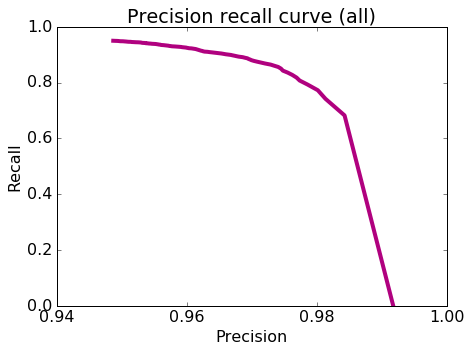

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

The minimum threshold value that gives us 96.5% precision and just 3.5% false positives is:

In [29]:
threshold_values[np.array(precision_all) >= 0.965].min()

0.83838383838383845

Using `threshold` = 0.98, we get 5826 false negatives.

In [31]:
threshold = 0.98
predictions = apply_threshold(probabilities, threshold)
confusion_matrix = graphlab.evaluation.confusion_matrix(test_data['sentiment'], predictions)
confusion_matrix

target_label,predicted_label,count
1,-1,5826
1,1,22269
-1,-1,4754
-1,1,487


This is the number of false negatives (i.e the number of reviews to look at when not needed) that we have to deal with using this classifier.

# Evaluating specific search terms

So far, we looked at the number of false positives for the **entire test set**. Now let's select reviews using a specific search term and optimize the precision on these reviews only. After all, a manufacturer would be interested in tuning the false positive rate just for their products (the reviews they want to read) rather than that of the entire set of products on Amazon.

## Precision-Recall on all baby related items

In [32]:
baby_reviews =  test_data[test_data['name'].apply(lambda x: 'baby' in x.lower())]

Now, let's predict the probability of classifying these reviews as positive:

In [33]:
probabilities = model.predict(baby_reviews, output_type='probability')

Let's plot the precision-recall curve for the **baby_reviews** dataset.

**First**, let's consider the following `threshold_values` ranging from 0.5 to 1:

In [34]:
threshold_values = np.linspace(0.5, 1, num=100)

**Second**, as we did above, let's compute precision and recall for each value in `threshold_values` on the **baby_reviews** dataset.  Complete the code block below.

In [36]:
precision_all = []
recall_all = []

for threshold in threshold_values:
    
    # Make predictions. Use the `apply_threshold` function 
    predictions = apply_threshold(probabilities, threshold)

    # Calculate the precision and recall
    precision = graphlab.evaluation.precision(baby_reviews['sentiment'], predictions)
    recall = graphlab.evaluation.precision(baby_reviews['sentiment'], predictions)
    
    # Append the precision and recall scores.
    precision_all.append(precision)
    recall_all.append(recall)

**Quiz Question**: Among all the threshold values tried, what is the **smallest** threshold value that achieves a precision of 96.5% or better for the reviews of data in **baby_reviews**? Round your answer to 3 decimal places.

In [37]:
threshold_values[np.array(precision_all) >= 0.965].min()

0.86363636363636365

**Finally**, let's plot the precision recall curve.

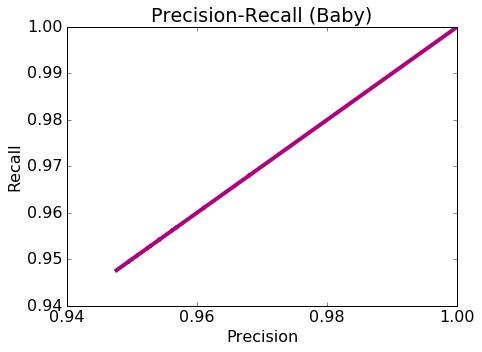

In [38]:
plot_pr_curve(precision_all, recall_all, "Precision-Recall (Baby)")